## **1.1 Оценки математического ожидания, дисперсии, медианы**

#### **Пусть случайная величина $\xi$ имеет распределение, задаваемое плотностью $ f_ξ(x) = θ^2xe^{−θx} $. Для каждого $\theta$ ∈ {0.5, 2, 8}:**
**1.
(a) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$. Привести в отчет.**

Определение плотности гамма распределения для одной СВ:

$ f_X(x) = \frac{\theta^{\alpha}}{Г(\alpha)}x^{\alpha-1}e^{-\theta x}, x > 0$

$ \alpha = 2 $

**Математическое ожидание непрерывной случайной величины:**

При $ \theta = 0.5 $:

$$ E[\xi] = \frac{\alpha}{\theta} = 4 $$

При $ \theta = 2 $:

$$ E[\xi] = \frac{\alpha}{\theta} = 1 $$

При $ \theta = 8 $:

$$ E[\xi] = \frac{\alpha}{\theta} = \frac{1}{4} $$


**Дисперсия:**

При $ \theta = 0.5 $:

$$ E[\xi] = \frac{\alpha}{\theta^2} = 8 $$

При $ \theta = 2 $:

$$ D[\xi] = \frac{\alpha}{\theta^2} = \frac{1}{2} $$

При $ \theta = 8 $:

$$ E[\xi] = \frac{\alpha}{\theta^2} = \frac{1}{32} $$

**Математическое ожидание квадрата $\xi$:**

$$ E[\xi^2] = \frac{\alpha(\alpha + 1)}{\theta^2} $$

При $ \theta = 0.5 $:

$$ E[\xi^2] = D[\xi] + (E[\xi])^2 = \frac{\alpha}{\theta^2} + (\frac{\alpha}{\theta})^2 = \frac{6}{\theta^2} = 24 $$

При $ \theta = 2 $:

$$ E[\xi^2] = \frac{6}{\theta^2} = \frac{3}{2} $$

При $ \theta = 8 $:

$$ E[\xi^2] = \frac{6}{\theta^2} = \frac{3}{32} $$

In [1]:
an_results = {}

thetas = [0.5, 2, 8]

alpha = 2

for theta in thetas:
  E_x = alpha / theta
  D_x = alpha / theta ** 2
  E_x_2 = 6 / theta ** 2

  an_results[theta] = {'mean': E_x, 'var': D_x, 'squared': E_x_2}

In [2]:
an_results

{0.5: {'mean': 4.0, 'var': 8.0, 'squared': 24.0},
 2: {'mean': 1.0, 'var': 0.5, 'squared': 1.5},
 8: {'mean': 0.25, 'var': 0.03125, 'squared': 0.09375}}

**(b) Для k ∈ {$2^{4}$, $2^{5}$, ... , $2^{15}$} построить выборку из k элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта.
Для каждой из выборок и оценок визуализировать это все на графиках (для каждой оценки - свой график), где по вертикальной оси - оценка, а по горизонтальной - k, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку**

In [9]:
import scipy.stats as sps
import numpy as np
from collections import defaultdict

np.random.seed(42)

theta = 2
alpha = 2

stats = {}
k_vals = [2**pow for pow in range(4, 16)]

for theta in thetas:
  stats[theta] = {'k': [], 'mean': [], 'var': [], 'squared': []}
  for k in k_vals:
    sample = sps.gamma.rvs(a=alpha, scale=1/theta, size=k)
    stats[theta]['k'].append(k)
    stats[theta]['mean'].append(sample.mean())
    stats[theta]['var'].append(sample.var())
    stats[theta]['squared'].append(np.mean(sample**2))

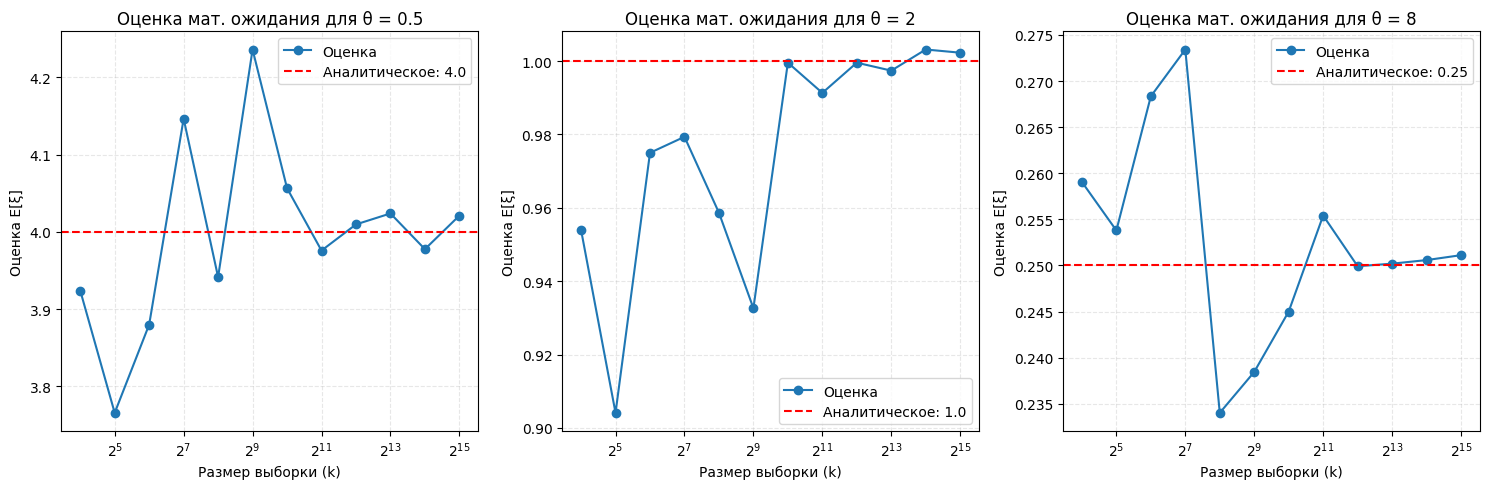

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, theta in enumerate(thetas):
    ax = axes[i]

    k_vals = stats[theta]['k']
    mean_est = stats[theta]['mean']
    analytical_mean = an_results[theta]['mean']

    ax.plot(k_vals, mean_est, 'o-', label='Оценка')
    ax.axhline(y=analytical_mean, color='r', linestyle='--', label=f'Аналитическое: {analytical_mean}')

    ax.set_xscale('log', base=2)
    ax.set_xlabel('Размер выборки (k)')
    ax.set_ylabel('Оценка E[ξ]')
    ax.set_title(f'Оценка мат. ожидания для θ = {theta}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


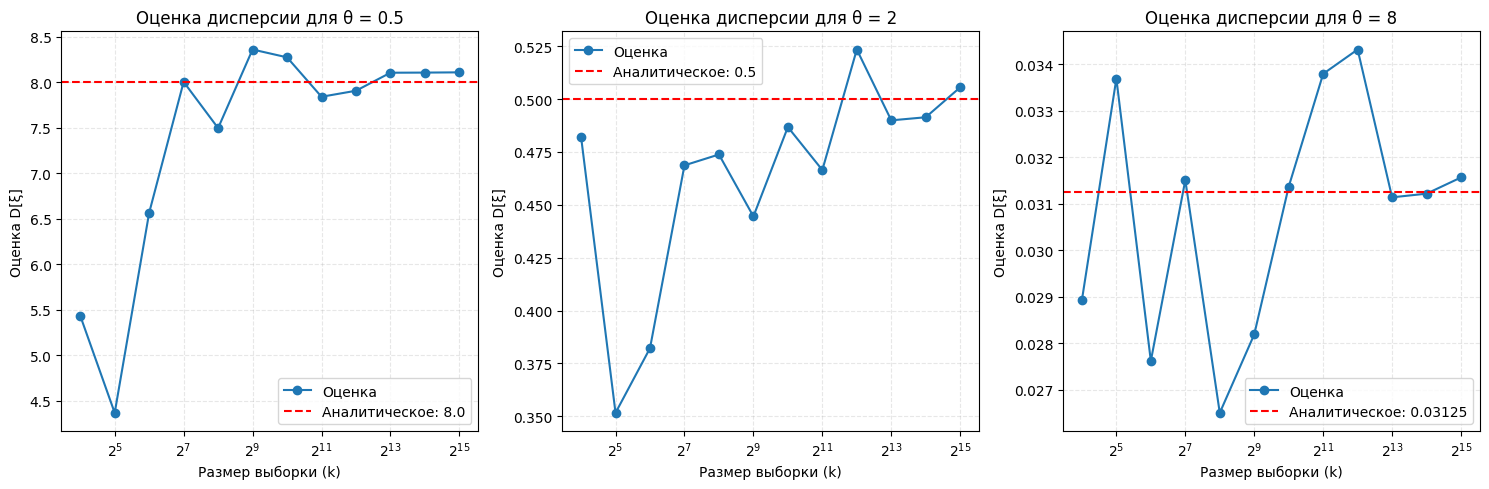

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, theta in enumerate(thetas):
    ax = axes[i]

    k_vals = stats[theta]['k']
    var_est = stats[theta]['var']
    analytical_var = an_results[theta]['var']

    ax.plot(k_vals, var_est, 'o-', label='Оценка')
    ax.axhline(y=analytical_var, color='r', linestyle='--', label=f'Аналитическое: {analytical_var}')

    ax.set_xscale('log', base=2)
    ax.set_xlabel('Размер выборки (k)')
    ax.set_ylabel('Оценка D[ξ]')
    ax.set_title(f'Оценка дисперсии для θ = {theta}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

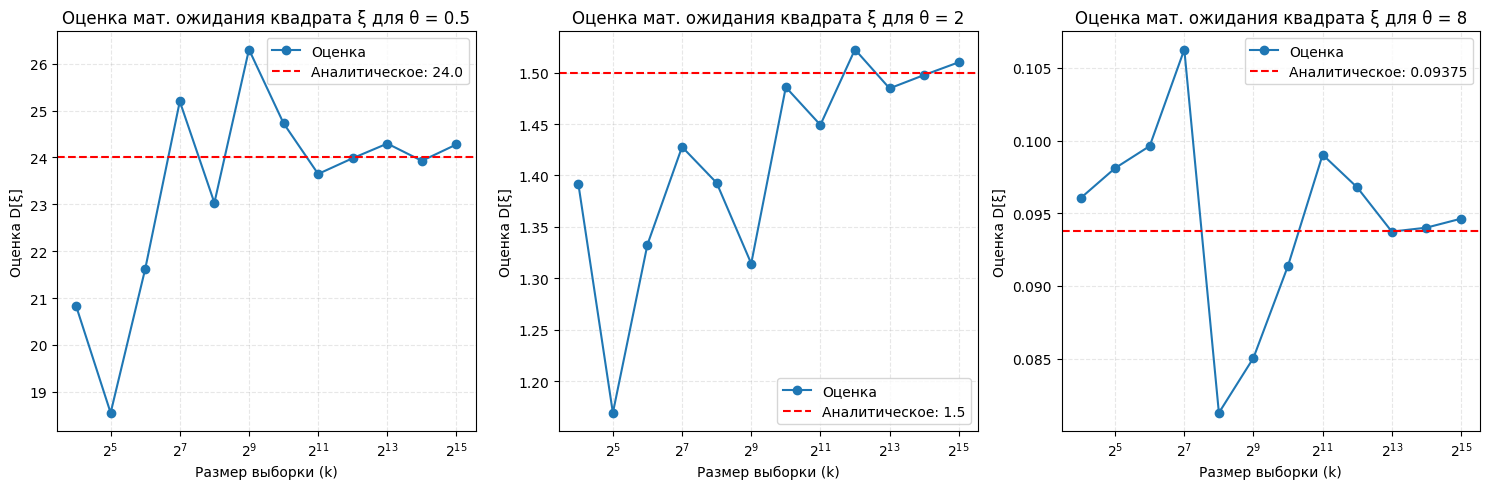

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, theta in enumerate(thetas):
    ax = axes[i]

    k_vals = stats[theta]['k']
    sqr_mean_est = stats[theta]['squared']
    analytical_sqr_mean = an_results[theta]['squared']

    ax.plot(k_vals, sqr_mean_est, 'o-', label='Оценка')
    ax.axhline(y=analytical_sqr_mean, color='r', linestyle='--', label=f'Аналитическое: {analytical_sqr_mean}')

    ax.set_xscale('log', base=2)
    ax.set_xlabel('Размер выборки (k)')
    ax.set_ylabel('Оценка D[ξ]')
    ax.set_title(f'Оценка мат. ожидания квадрата ξ для θ = {theta}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**2. Дана плотность распределения случайной величины $\xi$. Пусть $(\lambda, \alpha) = (2, 2)$**


$$f_ξ(x) = \begin{cases}
λe^{-λ(x-a)}, & x ≥ a \\
0, & \text{иначе}
\end{cases}$$

**(a) Аналитически вычислите значение моды, математического ожидания и медианы.**

Распределение - сдвинутое экспоненциальное

**Мода:**

$mode = \alpha = 2$

**Математическое ожидание:**

$ E[x] = \alpha + \frac{1}{\lambda} = \frac{5}{2} $

**Медиана:**

Функция распределения:

Для $x < a$:
$F(x) = 0$

Для $x \ge a$:
$F(x) = \int_{a}^{x} \lambda e^{-\lambda(t-a)}\,dt$

Вычислим интеграл:

$ F(x) = \int_{0}^{x-a} \lambda e^{-\lambda u}\,du = \left[ -e^{-\lambda u} \right]_{0}^{x-a} = 1 - e^{-\lambda(x-a)}$

Медиана $m$ определяется из условия:
$P(\xi \le m) = \frac{1}{2}$

То есть:
$F(m) = 1 - e^{-\lambda(m-a)} = \frac{1}{2}$

Решая уравнение, получаем:

$e^{-\lambda(m-a)} = \frac{1}{2}$

$-\lambda(m-a) = \ln \frac{1}{2} = -\ln 2$

$m - a = \frac{\ln 2}{\lambda}$

$\boxed{m = a + \frac{\ln 2}{\lambda}}$

Подставляя значения параметров, получаем:

$m = 2 + \frac{\ln 2}{2}$


**(b) Создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды математического жидания и медианы.**

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns
import numpy as np
np.random.seed(42)

_lambda = 2
a = 2

large_size = 10000
small_size = 20

large_sample = a + np.random.exponential(scale=1/_lambda, size=large_size)
small_sample = a + np.random.exponential(scale=1/_lambda, size=small_size)

mode_l = mode(large_sample, keepdims=True)[0]
mode_s = mode(small_sample, keepdims=True)[0]

mean_l = np.mean(large_sample)
mean_s = np.mean(small_sample)

median_l = np.median(large_sample)
median_s = np.median(small_sample)

print("Мода:")
print("Аналитическое значение:", 2)
print("Большая выборка:", mode_l)
print("Маленькая выборка:", mode_s)
print('-------------')

print("Мат. ожидание:")
print("Аналитическое значение:", 2.5)
print("Большая выборка:", mean_l)
print("Маленькая выборка:", mean_s)
print('-------------')

print("Медиана:")
print("Аналитическое значение:", 2.34657)
print("Большая выборка:", median_l)
print("Маленькая выборка:", median_s)
print('-------------')

Мода:
Аналитическое значение: 2
Большая выборка: [2.00000582]
Маленькая выборка: [2.00349095]
-------------
Мат. ожидание:
Аналитическое значение: 2.5
Большая выборка: 2.4887494773451175
Маленькая выборка: 2.412490598545824
-------------
Медиана:
Аналитическое значение: 2.34657
Большая выборка: 2.3391574793230996
Маленькая выборка: 2.278821687664316
-------------


**(c) Постройте для первой выборки на одном графике: гистограмму распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией распределения плотности и аналитическими значениями мод, математического жидания и медианы. То же самое, для второй.**

In [17]:
# Функция распределения плотности
def pdf(x):
    return _lambda * np.exp(-_lambda * (x - a))

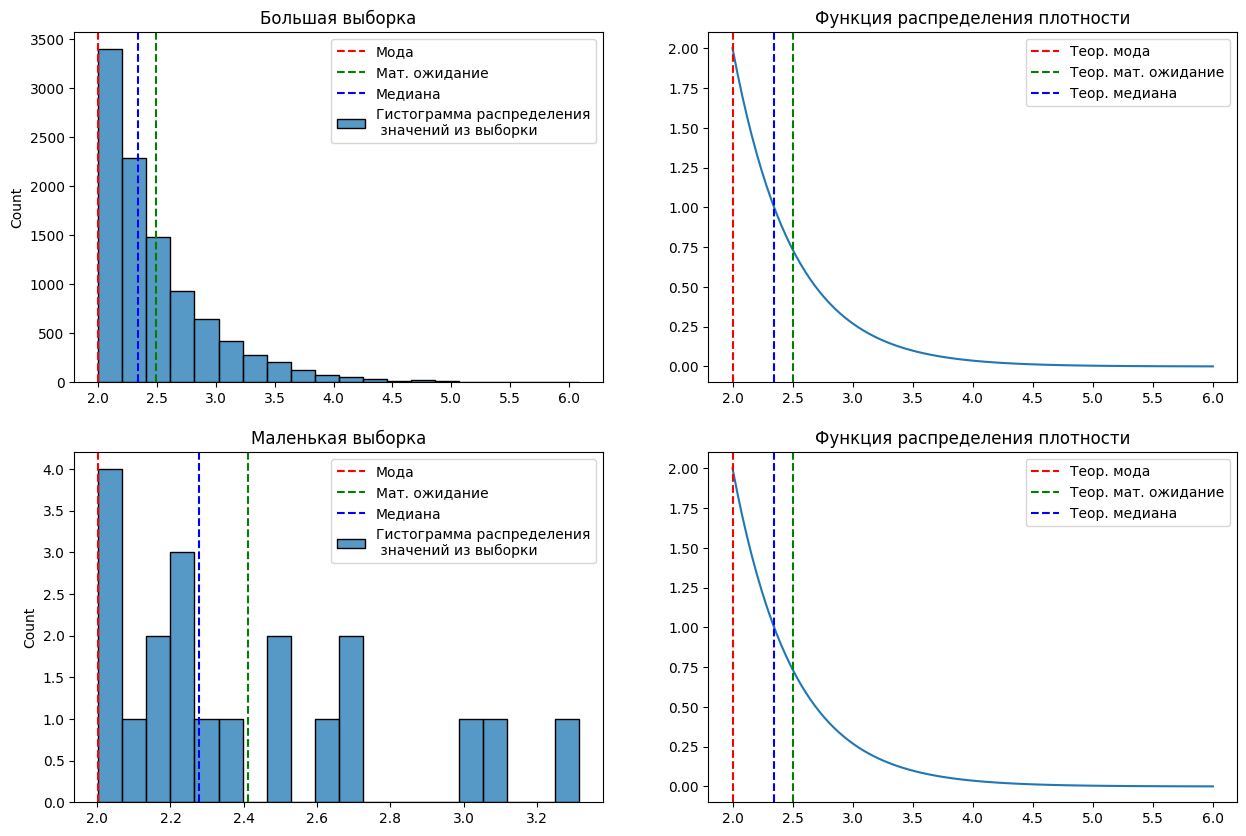

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

ax1 = axes[0][0]
sns.histplot(large_sample, ax = ax1, bins=20, label='Гистограмма распределения\n значений из выборки')
ax1.axvline(x=mode_l, color='r', linestyle='--', label=f'Мода')
ax1.axvline(x=mean_l, color='g', linestyle='--', label=f'Мат. ожидание')
ax1.axvline(x=median_l, color='b', linestyle='--', label=f'Медиана')
ax1.set_title("Большая выборка")
ax1.legend()

ax2 = axes[1][0]
sns.histplot(small_sample, ax = ax2, bins=20, label='Гистограмма распределения\n значений из выборки')
ax2.axvline(x=mode_s, color='r', linestyle='--', label=f'Мода')
ax2.axvline(x=mean_s, color='g', linestyle='--', label=f'Мат. ожидание')
ax2.axvline(x=median_s, color='b', linestyle='--', label=f'Медиана')
ax2.set_title("Маленькая выборка")
ax2.legend()

x = np.linspace(2, 6, 100)
ax3 = axes[0][1]
ax3.plot(x, pdf(x))
ax3.axvline(x=2, color='r', linestyle='--', label=f'Теор. мода')
ax3.axvline(x=2.5, color='g', linestyle='--', label=f'Теор. мат. ожидание')
ax3.axvline(x=2.34657, color='b', linestyle='--', label=f'Теор. медиана')
ax3.set_title("Функция распределения плотности")
ax3.legend()

x = np.linspace(2, 6, 100)
ax4 = axes[1][1]
ax4.plot(x, pdf(x))
ax4.axvline(x=2, color='r', linestyle='--', label=f'Теор. мода')
ax4.axvline(x=2.5, color='g', linestyle='--', label=f'Теор. мат. ожидание')
ax4.axvline(x=2.34657, color='b', linestyle='--', label=f'Теор. медиана')
ax4.set_title("Функция распределения плотности")
ax4.legend()

**(d) Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или нет.**

100%|██████████| 100/100 [00:03<00:00, 25.34it/s]


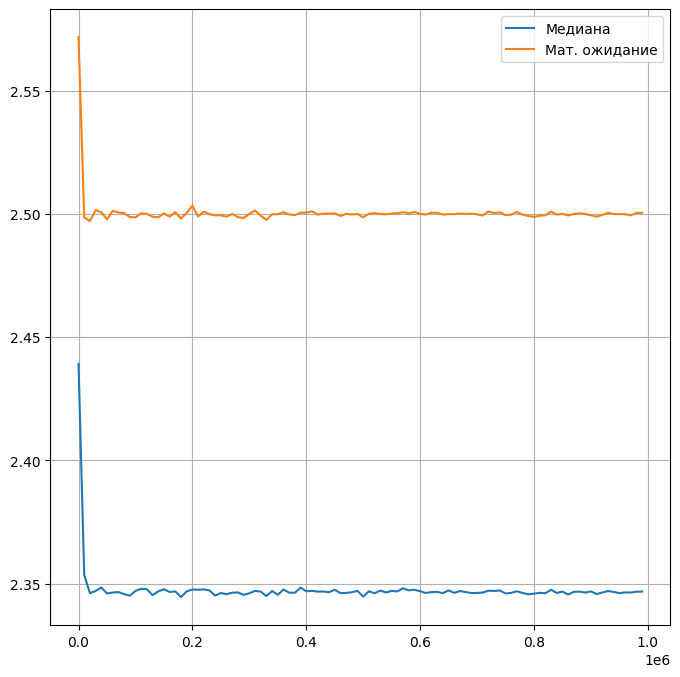

In [22]:
from scipy.stats import mode
from tqdm import tqdm

sizes = []
medians = []
means = []

for size in tqdm(range(20, 1000000, 10000)):
    sample = a + np.random.exponential(scale=1/_lambda, size=size)

    mode_ = mode(sample, keepdims=True)[0]
    mean = np.mean(sample)
    median = np.median(sample)

    sizes.append(size)
    medians.append(median)
    means.append(mean)

plt.figure(figsize=(8, 8))
plt.plot(sizes, medians, label='Медиана')
plt.plot(sizes, means, label='Мат. ожидание')
plt.grid(linestyle='-')
plt.legend()
plt.show()

## **1.2 Моделирование совместного распределения двух СВ**

**Пусть совместное распределение двух случайных величин задано таблицей:**

|  ξ/η  | 1                                   | 2     | 3    | ...  |  P(ξ)  |
|-------|-------------------------------------|-------|------|------|------|
| -1    | $$\frac{2}{5} \cdot \frac{1}{2^1}$$ | $$\frac{2}{5} \cdot \frac{1}{2^2}$$  | $$\frac{2}{5} \cdot \frac{1}{2^3}$$ | ... | $\frac{2}{5}$ |
| 0     | $$\frac{1}{5} \cdot \frac{1}{2^1}$$ | $$\frac{1}{5} \cdot \frac{1}{2^2}$$ | $$\frac{1}{5} \cdot \frac{1}{2^3}$$ | ... | $\frac{1}{5} $ |
| 1     | $$\frac{2}{5} \cdot \frac{1}{2^1} $$ | $$\frac{2}{5} \cdot \frac{1}{2^2} $$ | $$\frac{2}{5} \cdot \frac{1}{2^3} $$ | ... | $\frac{1}{5} $ |
| P(η)  | $\frac{1}{2^1}$ | $\frac{1}{2^2}$ | $\frac{1}{2^3}$ | ... | 1

**где $ \eta \in \mathbb{N} $. Вычислить корреляционую матрицу
аналитически и приближенно (на основе моделирования).**




### **Аналитическое решение**

**Маргинальные распределения:**

Сумма вероятностей по случайным величинам $ \xi, \eta $ должна быть равна 1.

$ k \in \mathbb{N} $

$ P(\xi=-1, \eta=k) = \frac{2}{5} \sum_{1}^{k} \frac{1}{2^k} $

$ P(\xi=0, \eta=k) = \frac{1}{5} \sum_{1}^{k} \frac{1}{2^k} $

$ P(\xi=1, \eta=k) = \frac{2}{5} \sum_{1}^{k} \frac{1}{2^k} $

Последовательность - геометрическая прогрессия

При $ |q| < 1 $:

$$ \lim_{n \to \infty} S_n = \frac{b_1}{(1-q)} $$

$ b_1 = \frac{1}{2} $

$ q = \frac{1}{2} $

$$ \lim_{n \to \infty} S_n = 1  $$

$ P(\xi=-1, \eta=k) = \frac{2}{5} \cdot 1 $

$ P(\xi=0, \eta=k) = \frac{1}{5} \cdot 1 $

$ P(\xi=1, \eta=k) = \frac{2}{5} \cdot 1 $

$ \frac{2}{5} + \frac{1}{5} + \frac{2}{5} = 1 $

=> таблица совместного распределения верна

**Мат. ожидания:**

$ E(\xi) = -1 \cdot \frac{2}{5} + 1 \cdot \frac{2}{5} = 0 $

$$ \sum_{n=1}^{\infty} n \cdot x^n = \frac{x}{(1-x)^2}, |x| < 1 $$

$ E(\eta) = \sum_{n=1}^{k} n \cdot \frac{1}{2^n} = 2 $

**Дисперсии и ковариация:**

$ cov(\xi, \eta) = E[(\xi - E\xi)(\eta - E\eta)] = E[\xi\eta] - E\xi*E\eta = E[\xi\eta] - 0 $

$ E[\xi\eta] = -1 \cdot \frac{2}{5} \sum_{n=1}^{k} n \cdot \frac{1}{2^n} +
1 \cdot \frac{2}{5} \sum_{n=1}^{k} n \cdot \frac{1}{2^n}  = 0 $

$ cov(\xi, \eta) = 0 $

Величины некоррелированы

$ D(\xi) = E(\xi^2) - (E\xi)^2 = (-1)^2 \cdot \frac{2}{5} + (1)^2 \cdot \frac{2}{5} - 0 = \frac{4}{5} $

$$ \sum_{n=1}^{\infty} n^2 \cdot x^n = \frac{x(1+x)}{(1-x)^3}, |x| < 1 $$

$ D(\eta) = E(\eta^2) - (E\eta)^2 = \sum_{n=1}^{k} n^2 \cdot \frac{1}{2^n} - 4 = 6 - 4 = 2 $

$$ \Sigma =  \Bigg( \begin{matrix} \frac{4}{5} & 0 \\ 0 & 2 \end{matrix} \Bigg) $$

**Корреляция:**
$$\rho(\xi,\eta) = \frac{Cov(\xi,\eta)}{\sqrt{Var[\xi]Var[\eta]}}$$

$$ \rho(\xi,\eta) = 0 $$

$$ R =  \Bigg( \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \Bigg) $$

### **Моделирование распределений**

In [15]:
import scipy.stats as sps
import numpy as np
np.random.seed(42)

size=100000

# Моделирование eta
eta = sps.geom.rvs(p=0.5, size=size)

# Моделирование xi
values = [-1, 0, 1]
p = [2/5, 1/5, 2/5]
xi = np.random.choice(values, size=size, p=p)

cov_matrix = np.cov(xi, eta, ddof=1)

print(f"Матрица ковариации\n{cov_matrix}\n\n")

corr_coef = np.corrcoef(xi, eta)

print(f"Матрица корреляции\n{corr_coef}")

Матрица ковариации
[[0.8001375  0.00284597]
 [0.00284597 1.96965549]]


Матрица корреляции
[[1.         0.00226701]
 [0.00226701 1.        ]]
